# Numerical Integration II


[//]: # "_**Importance sampling; MCMC (Gibbs, Metropolis-H); GHK**_"


[//]: # "Here we introduce the method of Monte Carlo Integrations."


## Monte Carlo Integration

- Let's consider a function $g(X)$ which is to be integrated in $[a,b]$. With some algebra, we can express the problem as

$$\begin{aligned}
I = \int_a^b g(x) dx = (b-a) \int_a^b g(x) \frac{1}{b-a} dx = (b-a) E[g(X)]
\end{aligned}$$


- where $\frac{1}{b-a}$ may be regarded as the density function of a uniform distribution in $[a,b]$, and thus $\int_a^b g(x) \frac{1}{b-a} dx$ becomes the expected value of $g(X)$ *assuming* $X$ follows a uniform distribution in $[a,b]$.


- Here we provide an intuitive explanation of the approach based on the one-dimensional integration problem


- The advantage of making the transformation is that the population mean, $E[g(x)]$, can then be numerically approximated by the sample average of $g(x_i)$, $x_i \in [a,b]$, based on the law of large numbers which is quite manageable


- To be more specific, we can define $p(x)=1/(b-a)$ as the density function of a uniform distribution for$x \in (a,b)$, and 
$$I = \int_a^b [g(x)/p(x)] p(x)dx = (b-a) \int_a^b g(x) p(x) dx = (b-a) E[g(x)]$$ 


- The algebra looks similar to what we would do for **importance sampling** (will be introduced later), but $p(x)$ in this case is a uniform distribution which does not put emphasis on particular ("importance") region of the domain and is not in the spirit of importance sampling.



- In practice of Monte Carlo integration, for a given problem we often transform the domain from $[a,b]$ to $[0,1]$, via the change of variables, before applying the rule. This is particularly so for quasi-Monte Carlo integrations using low discrepancy sequence, as we will see soon. Doing so we have

$$\begin{aligned}
I = \int_a^b g(x) dx = \int_0^1 f(t) dt = (1-0) \int_0^1 f(t) \frac{1}{1-0} dt = E[f(t)].
\end{aligned}$$


- Here, we need to find a transformation rule $x=\rho(t)$ such that $\rho^{-1}(b)=1$ and $\rho^{-1}(a)=0$. Then, $f(t) = g(\rho(t)) \rho'(t)$ where $\rho'(t)$ is the Jacobian. 


> We sometimes see statements which equate the Monte Carlo integration to the sample average of the function. It is an oversimplified statement. The statement is correct with respect to $f(t)$ or a normalized $g(x)$, but is problematic w.r.t. $g(x)$ itself.

- If you only need to do the integration once and both of $a$ and $b$ are finite, it may be quicker for you to simply work on $g(x)$ and draw random numbers from $[a,b]$. However, if you want to do the integration systematically for different types of problems, you may want to transform the problem and work on $f(t)$ instead. The reasons are:

1. There are known rules of transforming $[a,b]$ to $[0,1]$ for $a$ and $b$ ranging from $-\infty$ to $\infty$, so this part is not difficult

2. After the conversion, the random numbers are all drawn from $[0,1]$ instead of $[a,b]$

3. Any multidimensional function with bounds on each variable can be transformed into the unit n-dimensional hypercube, $[0, 1]^d$

4. Because of the above, it's easy to write a computer program to automate the process, from domain and function transformation to random number sampling and to computing the final result

The following table provides rules of transformation (credit to 陳明鴻).

$$\mathbf{x\,\ domain}$$ | $$\mathbf{transformation}$$ | $$\mathbf{t\,\ domain}$$ | $$\mathbf{Jacobian}$$ 
 ---     |  ---    | ---      | --- 
$$[a, b]$$            | $$x = a + (b-a)t$$ | $$[0,1]$$ | $$b - a$$
$$[-\infty, \infty]$$ | $$x = \frac{2t-1}{t-t^2}$$        | $$[0,1]$$ | $$\frac{2t^2 - 2t+1}{(t^2 -t)^2}$$
$$[a, \infty]$$       | $$x = a + \frac{t}{1-t}$$    | $$[0,1]$$ | $$\frac{1}{(t-1)^2}$$
$$[-\infty, b]$$      | $$x = b + \frac{t-1}{t}$$    | $$[0,1]$$ | $$\frac{1}{t^2}$$


- we estimate $E[f(t)]$ by $\bar{f}_n$:

$$\begin{aligned}
 E[f(t)] \approx \bar{f}_n = \frac{1}{n} \sum_{i=1}^n f(t_i).
\end{aligned}$$

Therefore, 

$$\begin{aligned}
I = \int_a^b g(x) dx = \int_0^1 f(t)dt  \approx  \bar{f}_n =  \frac{1}{n} \sum_{i=1}^n f(t_i),
\end{aligned}$$

where $\{t_i\}$, $i=1,\ldots,n$ are randomly drawn from $[0,1]$ with a uniform probability.

The Monte Carlo integration is based on the law of large numbers such that the sample average ($\bar{f}_n$) should converge to the population mean of $E[f(t)]$ when $n$ approaches infinity. Put differently, a large $n$ ensures that the domain $[0,1]$ is sufficiently sampled to represent the population. 


### Homework 1


#### Consider the following integration problem: 
  $$\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

WebIO._IJuliaInit()

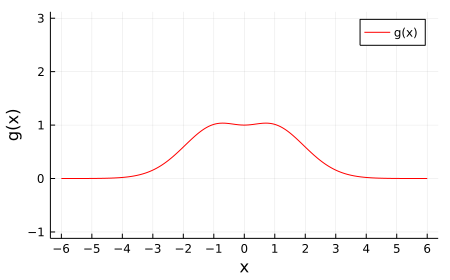

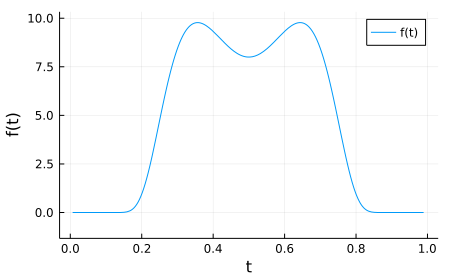

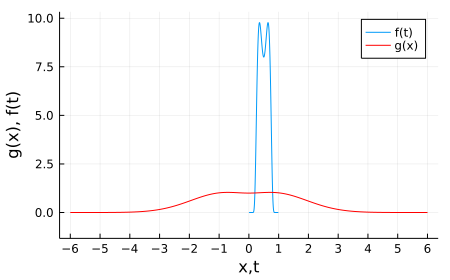

In [1]:
# solution to homwork 1, part I
using Random, Plots, Interact, HaltonSequences

function domain_trans_1()
    x(t) = (2t-1) / (t-t^2)
    jacobian(t) = (2t^2-2t+1) / (t^2-t)^2
    return x, jacobian
end


g(x) = exp(-x^2/3) * sqrt(1+x^2)
x, jacobian = domain_trans_1()
f(t) = g(x(t)) * jacobian(t)


plot(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,3], size=(450, 280), 
     label="g(x)", xlabel="x", ylabel="g(x)", linecolor= :red) |> display

plot(f, xticks=0:0.2:1, xlim=[0,1], ylim=[-1,10], size=(450, 280), 
     label="f(t)", xlabel="t", ylabel="f(t)") |> display

plot!(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,10], size=(450, 280), 
     label="g(x)", xlabel="x,t", ylabel="g(x), f(t)", linecolor = :red) 

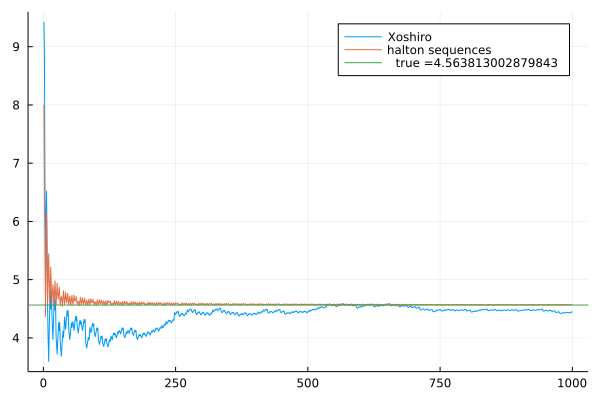

In [2]:
# solution to homework 1, part II
n = 1000
integral_result_xo = zeros(n)
integral_result_hal = zeros(n)

for i = 1:n
    integral_result_xo[i] = sum(f.(rand(Xoshiro(1234), i))) / i
    integral_result_hal[i] = sum(f.(Halton(2, length=i))) / i
end


plot(1:n, integral_result_xo, label="Xoshiro")
plot!(1:n, integral_result_hal, label="halton sequences")
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display

- It turns out that the uniform random sampling is easy but inefficient. It has at least two short-comings


- Here, by *efficient* we meant using fewer draws (smaller $n$) to estimate the population mean with good accuracy and small variance


- The function $g(x)$ or $f(t)$ most likely does not have a uniform profile. Instead, the volume of the integrand is likely to concentrate in one or a few regions in the domain. A uniform sampling would draw the same amount of samples from important regions as well as in regions where they contribute almost nothing to the integral, which is inefficient(Example: In the homework, the regions less than 0.1 or larger than 0.9 have essentially zero volume for $f(t)$.) A more efficient algorithm should draw more samples from important regions and less from unimportant regions. This is the idea behinds the _**importance sampling**_. 
    - "*If we draw more from a particular region and less from others, does it bias the mean estimate?*" No, it doesn't. The sampling probability would account for that. 


- Even if we decide to uniformly scan through the $(0,1)$ domain without concentrating on a particular region, we could use better strategies to have samples quickly and evenly covering the region


- a better strategy to do the evenly sampling is Quasi Monte Carlo integration